<a href="https://colab.research.google.com/github/ygordev/Data-Science/blob/main/10_YgorLima_tech_Projeto_Analisando_os_dados_do_Airbnb_Vancouver.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="25%" src="https://ygorlima.tech/wp-content/uploads/2021/11/Ygor_Lima-removebg-preview1.png">

Por Ygor Moreira Lima (admin@laboratoriodebits.com.br)

---

# Análise dos Dados do Airbnb - *Vancouver - Canadá*

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade de Vancouver (Canadá), e ver quais insights podem ser extraídos a partir de dados brutos.**

# **Obtenção dos dados**

In [3]:
# Importação dos pacotes necessários - Pandas, Matplotlib e Seaborn
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline

# Importação do arquivo que contém nossos dados de interesse
dados_url = "https://raw.githubusercontent.com/ygordev/Data-Science/main/vancouver-10SET2021-listings.csv"
df = pd.read_csv(dados_url)

# **Análise dos dados**

Para que possamos entender melhor o dataset com o qual estamos lidando, é importante entender quais são as variáveis envolvidas, bem como seu significado.


**Dicionário de Variáveis**
* `id` - número de id gerado para identificar o imóvel
* `name` - nome da propriedade anunciada
* `host_id` - número de id do proprietário (anfitrião) da propriedade
* `host_name` - Nome do anfitrião
* `neighbourhood_group` - esta coluna não contém nenhum valor válido
* `neighbourhood` - nome do bairro
* `latitude` - coordenada da latitude da propriedade
* `longitude` - coordenada da longitude da propriedade
* `room_type` - informa o tipo de quarto que é oferecido
* `price` - preço para alugar o imóvel
* `minimum_nights` - quantidade mínima de noites para reservar
* `number_of_reviews` - número de reviews que a propriedade possui
* `last_review` - data do último review
* `reviews_per_month` - quantidade de reviews por mês
* `calculated_host_listings_count` - quantidade de imóveis do mesmo anfitrião
* `availability_365` - número de dias de disponibilidade dentro de 365 dias

Analisaremos, então, as 5 primeiras entradas de nosso dataset.



In [3]:
# Mostrar as 5 primeiras entradas do dataset
df.head()

id  ...    license
0  10080  ...  18-476608
1  13188  ...  20-160253
2  13358  ...  18-611603
3  13490  ...        NaN
4  14267  ...  21-156500

[5 rows x 18 columns]

## **1 - Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

In [8]:
# Conseguimos identificar o número total de entradas (linhas) e variáveis (colunas) através do atributo shape, que é um array!

print("Entradas: \t {}".format(df.shape[0]))
print("Variáveis: \t {}".format(df.shape[1]))

Entradas: 	 4300
Variáveis: 	 18


## **2 - Qual a porcentagem de valores ausentes?**

In [11]:
# Para o cálculo da porcentagem de valores ausentes, utilizamos dois métodos inerentes ao dataframe. 
# O método isnull() apresenta quais entradas possuem valor nulo, e o método sum() realiza a soma destes valores nulos.

# Para uma melhor visualização, o método sort_values() permite uma organização DECRESCENTE dos valores ausentes

# A rigor, teremos um valor entre 0 e 1, para cada variável, que pode ser convertida para valores percentuais apenas multiplicando por 100.

(df.isnull().sum() / df.shape[0]).sort_values(ascending=False) 

neighbourhood_group               1.000000
license                           0.298605
reviews_per_month                 0.167209
last_review                       0.167209
longitude                         0.000000
name                              0.000000
host_id                           0.000000
host_name                         0.000000
neighbourhood                     0.000000
latitude                          0.000000
room_type                         0.000000
number_of_reviews_ltm             0.000000
price                             0.000000
minimum_nights                    0.000000
number_of_reviews                 0.000000
calculated_host_listings_count    0.000000
availability_365                  0.000000
id                                0.000000
dtype: float64

## **3 - Qual o tipo de distruibuição das variáveis?**

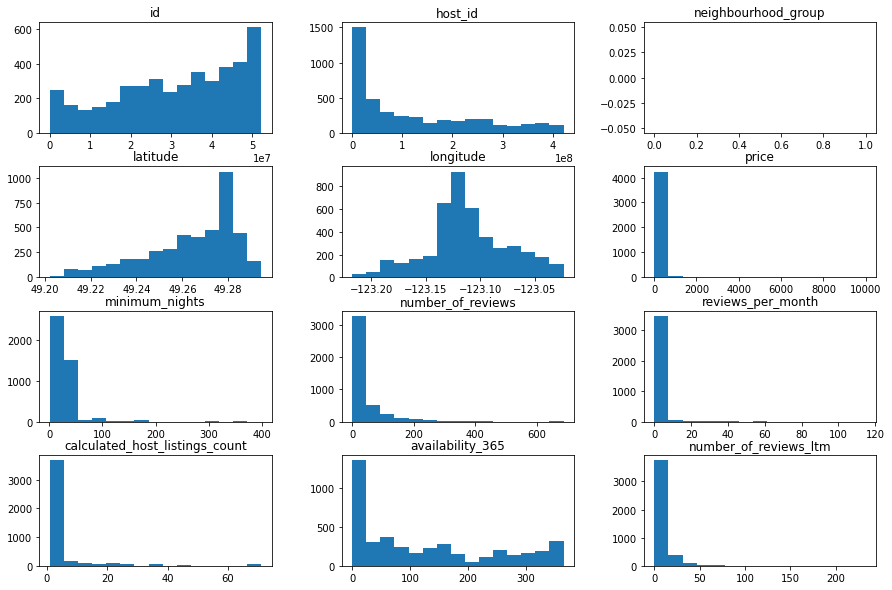

In [14]:
df.hist(bins=15, figsize=(15,10), grid=False);

## **3 - Há *outliers* presentes?**

Ao olhar o histograma de cada uma das variáveis, é possível verificar indícios da presença de outliers. 

Olhemos, por exemplo, para as variáveis `price`, `minimum_nights` e `calculated_host_listings_count`.

Os valores não seguem uma distribuição, além de distorcer toda a representação gráfica. Para realizarmos a confirmação, podemos nos valer de duas maneiras: 

*   Resumo estatístico por meio do método `describe()`
*   Plotar `boxplots` para a variável

In [9]:
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']].describe()

price  ...  availability_365
count  4300.000000  ...       4300.000000
mean    188.670233  ...        124.507442
std     303.082534  ...        122.616048
min      13.000000  ...          0.000000
25%      95.000000  ...          0.000000
50%     136.000000  ...         84.000000
75%     211.000000  ...        232.000000
max    9999.000000  ...        365.000000

[8 rows x 6 columns]

Observando o resumo estatístico acima, podemos confirmar algumas hipóteses, tais como:

* A variável `price` possui 75% dos valores abaixo de 211, porém seu valor máximo é 9999.
* A variável `minimum_nights` (quantia mínima de noites) possui valor máximo de 399, acima da quantidade de dias no ano (365). 
* A variável `reviews_per_month` possui um valor máximo de 114.81, muito acima da quantidade de dias em um mês. 

Para tratar os outliers, seguiremos os seguintes passos:

* Definir o Q1 e Q3 para as variáveis que serão limpas.
* Calcular o IQR para as variáveis.
* Definir o limite superior e inferior para cortar os outliers.
* Remover os outliers.

### Boxplot para ```price``` ##

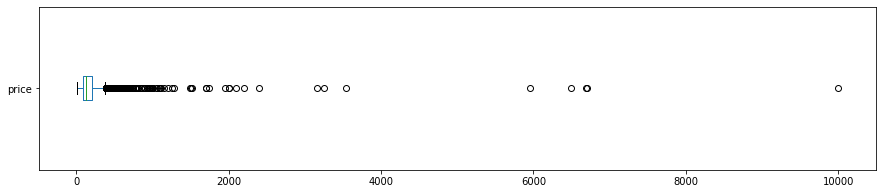

price: valores acima de 385.0

294 entradas - 6.8372%



In [4]:
# Boxplot para price

df.price.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

# Cálculo dos quartis, IQR e limites máximo e mínimo
q1_price = df.price.quantile(.25)
q3_price = df.price.quantile(.75)
IQR_price = q3_price - q1_price
sup_price = q3_price + (1.5*IQR_price)
inf_price = q1_price - (1.5*IQR_price)

# Ver quantidade de valores acima do limite máximo tolerável (outliers) 
print("price: valores acima de {}\n".format(sup_price))
print("{} entradas - {:.4f}%\n".format(len(df[df.price > sup_price]), (100*len(df[df.price > sup_price])/df.shape[0])))


### Boxplot para ```minimum_nights``` ##

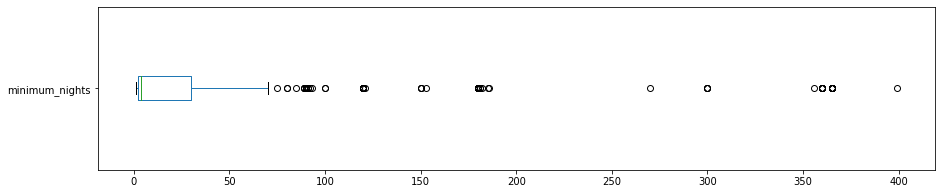

minimum_nights: Valores acima de 72.0

159 entradas - 3.6977%



In [5]:
# Boxplot para minimum_nights

df.minimum_nights.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

# Cálculo dos quartis, IQR, limites máximo e mínimo
q1_minimum_nights = df.minimum_nights.quantile(.25)
q3_minimum_nights = df.minimum_nights.quantile(.75)
IQR_minimum_nights = q3_minimum_nights - q1_minimum_nights
sup_minimum_nights = q3_minimum_nights + (1.5*IQR_minimum_nights)
inf_minimum_nights = q1_minimum_nights - (1.5*IQR_minimum_nights)

# Ver quantidade de valores acima do limite máximo tolerável (outliers) 
print("minimum_nights: Valores acima de {}\n".format(sup_minimum_nights))
print("{} entradas - {:.4f}%\n".format(len(df[df.minimum_nights > sup_minimum_nights]), (100*len(df[df.minimum_nights > sup_minimum_nights])/df.shape[0])))


###Histograma sem outliers##

Após termos identificado a presença de outliers nas variáveis `price` e `minimum_nights`, podemos passar para a remoção destes valores que distorcem nossa análise.

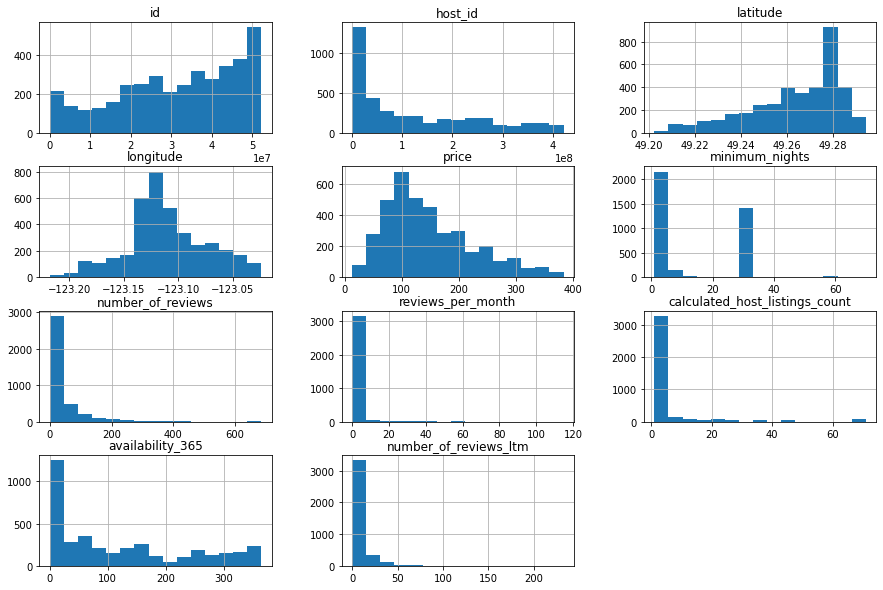

In [6]:
# Removendo os outliers
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > sup_price].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > sup_minimum_nights].index, axis=0, inplace=True)

# Removendo 'neighbourhood_group'
df_clean.drop('neighbourhood_group', axis=1, inplace=True)

# Plotando o histograma para as variáveis numéricas
df_clean.hist(bins=15, figsize=(15,10));

### Boxplot para price com os outliers originais removidos

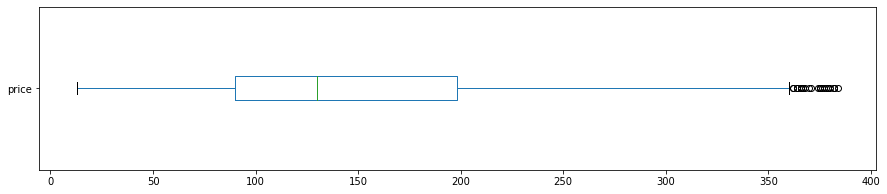

In [7]:
# Boxplot para price

df_clean.price.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

### Boxplot para minimum_nights com os outliers originais removidos

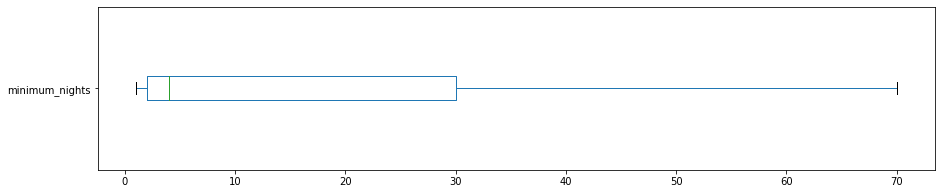

In [8]:
# Boxplot para minimum_nights

df_clean.minimum_nights.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

## **4 - Qual a correlação existente entre as variáveis?**

Duas variáveis estarem correlacionadas implicam na relação entre as duas, direta ou inversamente. 

A relação entre duas variáveis pode ser medida, e é função do coeficiente de correlação estabalecer qual a intensidade desta relação.

Para sermos capazes de identificar correlações, precisamos:

* Criar uma matriz de correlação; e
* Gerar um heatmap a partir dessa matriz, usando a biblioteca `seaborn.`

In [13]:
# Criando nossa matriz de correlação

corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']].corr()

display(corr)

price  ...  availability_365
price                           1.000000  ...          0.115280
minimum_nights                 -0.203259  ...          0.189932
number_of_reviews              -0.014916  ...          0.023169
reviews_per_month               0.068042  ...          0.046856
calculated_host_listings_count -0.106376  ...          0.022257
availability_365                0.115280  ...          1.000000

[6 rows x 6 columns]

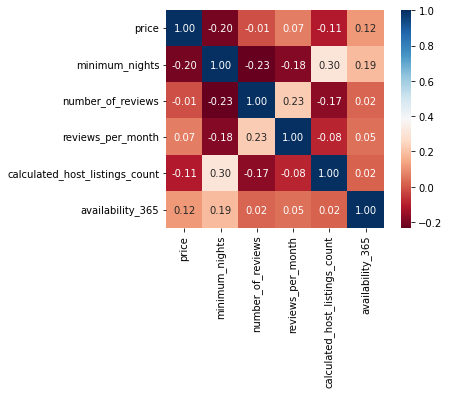

In [14]:
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

Como podemos perceber, não há uma forte correlação entre as variáveis. 

No entanto, a correlação entre `minimum_nights` e `calculated_host_listings_count` nos salta aos olhos. Ou seja: há uma relação direta, ainda que fraca, entre a quantidade de 'imóveis' anunciados por um anfitrião e o mínimo de noites em um imóvel. Cabe uma investigação mais aprofundada, de forma a descobrirmos a natureza de tal relação.

## **5 - Qual o tipo de imóvel mais alugado no AirBnb?**

Podemos identificar o tipo de imóvel mais alugado através de uma análise da variável `room_type`. 

In [15]:
# Mostrando a quantidade de cada tipo de imóvel

df_clean.room_type.value_counts()

Entire home/apt    3025
Private room        818
Shared room           7
Hotel room            4
Name: room_type, dtype: int64

In [16]:
# Mostrando a percentagem de cada tipo de imóvel disponível

df_clean.room_type.value_counts() / df_clean.shape[0]

Entire home/apt    0.784899
Private room       0.212247
Shared room        0.001816
Hotel room         0.001038
Name: room_type, dtype: float64

## **6 - Qual a localidade mais cara do dataset?**

Para que se possa responder esta pergunta, faz-se necessário o agrupamento dos dados da variável `neighbourhood`, e a extração da média de cada entrada neste agrupamento. 

In [17]:
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)

neighbourhood
West Point Grey             182.800000
Downtown Eastside           178.061538
Downtown                    177.166667
Kitsilano                   168.089965
Strathcona                  163.842105
West End                    151.140212
Arbutus Ridge               150.425532
Fairview                    146.470588
Dunbar Southlands           145.088235
Riley Park                  141.847291
Grandview-Woodland          138.929648
Shaughnessy                 134.622951
Mount Pleasant              132.969565
Killarney                   127.438596
Kensington-Cedar Cottage    123.688889
South Cambie                123.537037
Sunset                      121.513889
Hastings-Sunrise            117.808917
Kerrisdale                  113.145833
Marpole                     111.119565
Victoria-Fraserview         106.700000
Renfrew-Collingwood         103.569620
Oakridge                     99.716418
Name: price, dtype: float64

In [29]:
# Quantidade de entradas em West Point Grey
print("West Point Grey:\n")
print(df_clean[df_clean.neighbourhood == "West Point Grey"].shape[0])

# Quantidade de entradas em Downtown Eastside
print("\nDowntown Eastside:\n")
print(df_clean[df_clean.neighbourhood == "Downtown Eastside"].shape[0])

# Quantidade de entradas em Downtown
print("\nDowntown:\n")
print(df_clean[df_clean.neighbourhood == "Downtown"].shape[0])

# Inspecionando as 10 primeiras entradas em West Point Grey
df_clean[df_clean.neighbourhood == "West Point Grey"][:10]

West Point Grey:

45

Downtown Eastside:

195

Downtown:

942


id  ...    license
128   1378220  ...  21-157286
176   2216062  ...  21-156589
206   2985232  ...  19-161561
210   3021408  ...  21-156995
261   3742414  ...  21-156690
301   4568364  ...  21-156971
326   5005722  ...  21-156992
436   7432239  ...        NaN
445   7635114  ...  18-591290
570  11281139  ...  19-314861

[10 rows x 17 columns]

Adicionalmente, podemos plotar em um mapa as localidades de cada imóvel e entender a distribuição geográfica

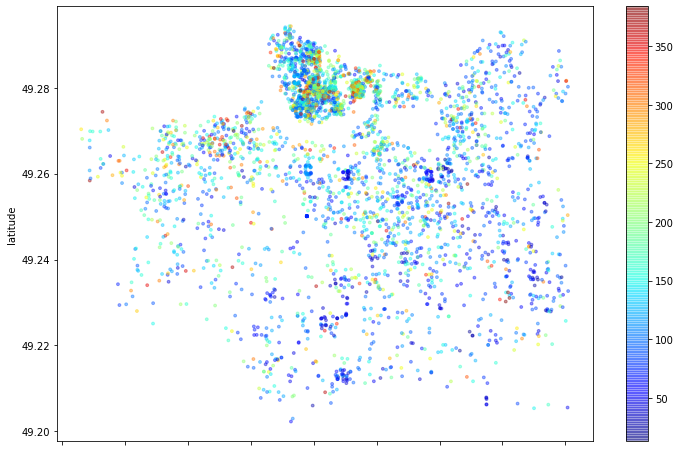

In [30]:
df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8));

Alternativamente, podemos visualizar a distribuição em um mapa georeferenciado, através da biblioteca `folium`

In [35]:
import folium

# Inicializando um mapa, centrado em Vancouver.
vancouver_map = folium.Map(location=[49.2588,-123.1299], zoom_start=13, tiles='cartodb positron')

lat = []
lon = []
value = []

dados = {
    'lat': lat,
    'lon': lon,
    'value': value
}

# Montando a estrutura de dados que contém a lat-long dos imóveis, bem como seu respectivo preço
for imovel in range(0, df_clean.shape[0]):
  lat.append(df_clean.latitude.values[imovel])
  lon.append(df_clean.longitude.values[imovel])
  value.append(df_clean.price.values[imovel])

# Atribuindo uma cor diferente para cada range de preços
for imovel in range(0, df_clean.shape[0]):
  if dados['value'][imovel] <= 100:
    cor = '#f1f8d0'
  elif dados['value'][imovel] <= 150:
    cor = '#efc271'
  elif dados['value'][imovel] <= 180:
    cor = '#e35d4d'
  else:
    cor = '#8b2a40'
  folium.CircleMarker(
      location=[dados['lat'][imovel], dados['lon'][imovel]],
      radius=2,
      color=cor,
      line_color=cor,
      fill_color=cor,
      fill=True).add_to(vancouver_map)


# Mostrando a representação do objeto
vancouver_map


## **7 - Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

Uma análise simples nos leva a esta resposta

In [27]:
df_clean.minimum_nights.mean()

13.646341463414634

# **Conclusão**



Por fim, podemos concluir que é fundamental **entender a natureza do negócio**, bem como **explorar os dados** apresentados e realizar operações para **identificar valores ausentes e outlier**s, assim como tratá-los.

Cabendo uma análise mais complexa, mas pode-se perceber que a distribuição da variável `price` se aproxima de uma distribução Weibull.

Mesmo uma análise simples como esta pode revelar insights interessantes sobre o negócio.
